# 🔧 Notebook Setup for 3-Class DeBERTa Fine-Tuning

This notebook sets up the environment to run the DeBERTa 3-class sentiment classification model from within a subdirectory (`notebooks/fine_tuning/fine_tuning_3class/`).

To ensure consistent paths (especially for model saving/loading), we manually add the project root to `sys.path`, so imports and relative paths from `src/` and `saved_models/` work as expected.


In [1]:
# cell 1
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, HTML, clear_output

In [2]:
# cell 2
import sys
from pathlib import Path

# Detect the project root relative to the current notebook directory
project_root = Path.cwd().resolve().parents[2]  # from notebooks/fine_tuning/fine_tuning_3class/
sys.path.append(str(project_root))

print(f"✅ Project root added to sys.path: {project_root}")

from src.config_three_class import CONFIG_3CLASS
from pathlib import Path

# Resolve and display model save path
model_path = Path(CONFIG_3CLASS["models"]["deberta"]["model_save_path"]).resolve()
print(f"📦 Model save path: {model_path}")


✅ Project root added to sys.path: /Users/tayebekavousi/Desktop/github_sa


📦 Model save path: /Users/tayebekavousi/Desktop/github_sa/notebooks/fine_tuning/fine_tuning_3class/saved_models/deberta_3class


Starting fine-tuning process...
[INFO] Initializing DeBERTa 3-class fine-tuner with model: microsoft/deberta-base
[INFO] Tokenizer loaded successfully.


Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/tayebekavousi/Desktop/github_sa/venv/lib/python3.12/site-packages/transformers/optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[INFO] Model microsoft/deberta-base initialized with 3 labels.
[INFO] Model moved to device: cpu
[INFO] Data module initialized.
[INFO] Model initialized on device: cpu
[INFO] Optimizer: AdamW with learning rate 2e-05
[INFO] ModelTrainer initialized.

[INFO] Starting DeBERTa 3-class fine-tuning process.
[INFO] Loading dataset...
[INFO] Loaded dataset with 11962 samples.
[INFO] Creating dataloaders...
[INFO] Dataloaders created.

[INFO] Starting training...
[INFO] Training started for 3 epochs.


Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/561 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/559M [00:00<?, ?B/s]

Evaluating:   0%|          | 0/113 [00:00<?, ?it/s]


⏱️  Epoch: 1/3
📊 Training   | Loss: 0.4633
📊 Validation | Loss: 0.3447 | Accuracy: 0.8785 | F1 Score: 0.8784

📈 New best model saved!


Training Batches:   0%|          | 0/561 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/113 [00:00<?, ?it/s]


⏱️  Epoch: 2/3
📊 Training   | Loss: 0.2615
📊 Validation | Loss: 0.3489 | Accuracy: 0.8880 | F1 Score: 0.8872

📈 New best model saved!


Training Batches:   0%|          | 0/561 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/113 [00:00<?, ?it/s]


⏱️  Epoch: 3/3
📊 Training   | Loss: 0.1864
📊 Validation | Loss: 0.4016 | Accuracy: 0.8924 | F1 Score: 0.8916

📈 New best model saved!
✅ Training complete!


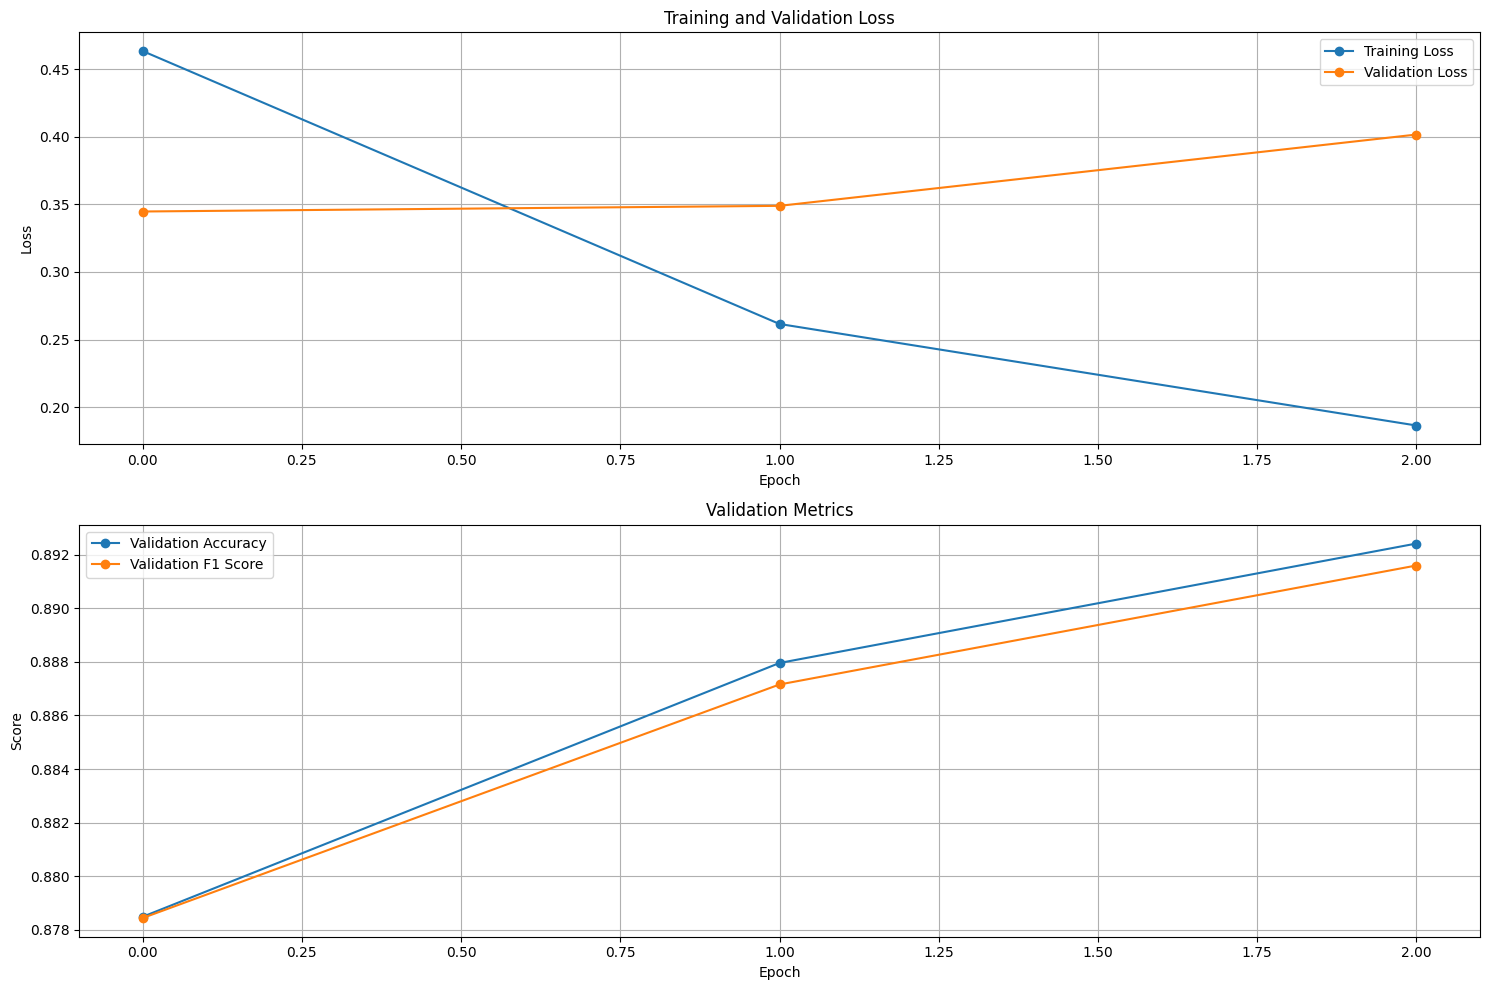

[INFO] Training complete.
[INFO] Evaluating model...
[INFO] Initializing model evaluator...
[INFO] Running evaluation...
[INFO] Evaluating model on 75 batches...
[INFO] Evaluation complete. Processed 1197 samples.
[INFO] Calculating metrics...
[INFO] Metrics calculated. Overall accuracy: 0.8981
[INFO] Generating evaluation report at saved_models/evaluation_results/deberta_3class_evaluation_report.pdf...
[INFO] Evaluation report saved as 'saved_models/evaluation_results/deberta_3class_evaluation_report.pdf'
[INFO] Calculating metrics...
[INFO] Metrics calculated. Overall accuracy: 0.8981
[INFO] Evaluation report generated at saved_models/evaluation_results/deberta_3class_evaluation_report.pdf
[INFO] Model evaluation metrics: {'accuracy': 0.898078529657477, 'precision': 0.8978441607942463, 'recall': 0.8980785296574769, 'f1': 0.8977066709064255, 'per_class': {'Negative': {'precision': 0.9028132992327366, 'recall': 0.8847117794486216, 'f1-score': 0.8936708860759494, 'support': 399.0}, 'Neu

In [4]:
# cell 3
from src.models.deberta_3class.train_deberta_3class import main

# Run the main function and capture the returned fine_tuner instance
print("Starting fine-tuning process...")
fine_tuner = main()
print("Fine-tuning process completed!")   

Final Evaluation Metrics:


,Metric,Value
0,accuracy,0.898079
1,precision,0.897844
2,recall,0.898079
3,f1,0.897707
4,per_class,"{'Negative': {'precision': 0.9028132992327366,..."
5,confusion_matrix,"[[353, 32, 14], [31, 343, 25], [7, 13, 379]]"


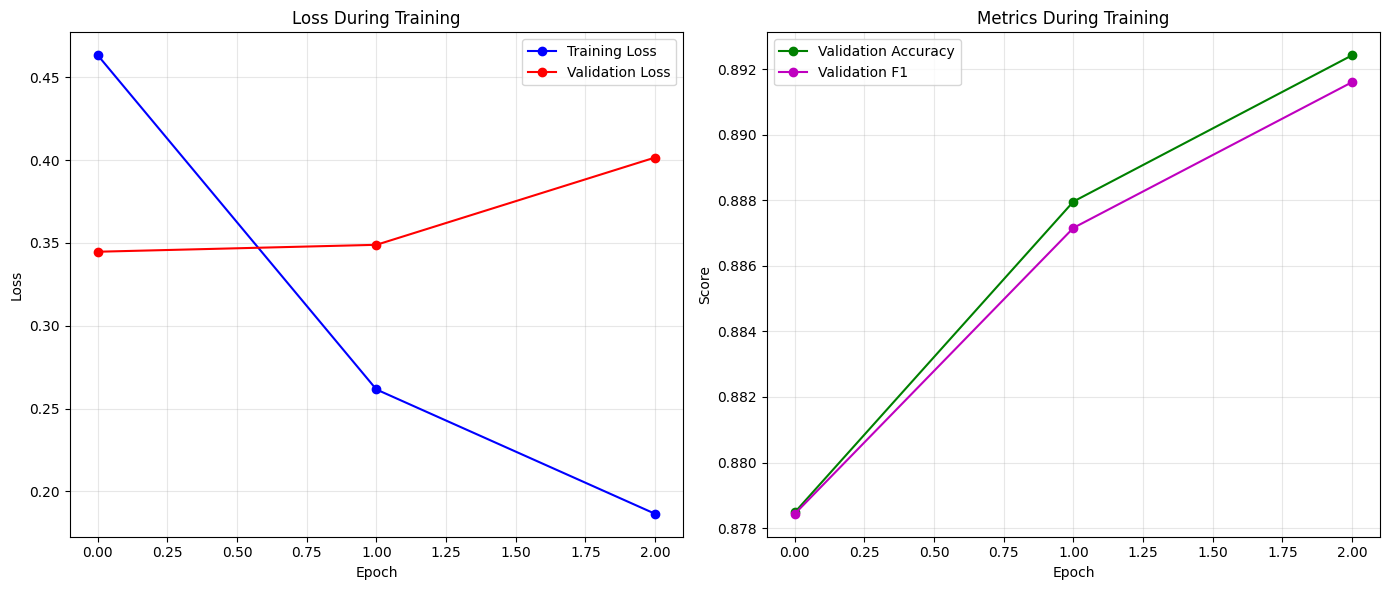

In [5]:
# Cell 4: View Training Results
    
# Display metrics if available
if hasattr(fine_tuner, 'metrics'):
    print("Final Evaluation Metrics:")
    metrics_df = pd.DataFrame([fine_tuner.metrics])
    display(metrics_df.T.reset_index().rename(columns={'index': 'Metric', 0: 'Value'}))
# Visualize training history if available
if hasattr(fine_tuner.trainer, 'history') and fine_tuner.trainer.history:
    history = fine_tuner.trainer.history
    if history.get('train_loss') and history.get('val_loss'):
        # Create figure
        plt.figure(figsize=(14, 6))
        # Plot training and validation loss
        plt.subplot(1, 2, 1)
        plt.plot(history['train_loss'], 'b-o', label='Training Loss')
        plt.plot(history['val_loss'], 'r-o', label='Validation Loss')
        plt.title('Loss During Training')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)
        # Plot performance metrics
        plt.subplot(1, 2, 2)
        if 'val_accuracy' in history:
            plt.plot(history['val_accuracy'], 'g-o', label='Validation Accuracy')
        if 'val_f1' in history:
            # Fix: Change 'p-o' to 'm-o' (magenta instead of purple)
            plt.plot(history['val_f1'], 'm-o', label='Validation F1')
        plt.title('Metrics During Training')
        plt.xlabel('Epoch')
        plt.ylabel('Score')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("No training history available.")

Loading test dataset...
✅ Test dataset loaded with 1197 samples.
Running comprehensive evaluation...
[INFO] Evaluating model on 75 batches...
[INFO] Evaluation complete. Processed 1197 samples.
[INFO] Calculating metrics...
[INFO] Metrics calculated. Overall accuracy: 0.8981
Saving predictions with confidence scores...
📄 Saved test set predictions to: saved_models/evaluation_results/test_predictions_with_confidence.csv


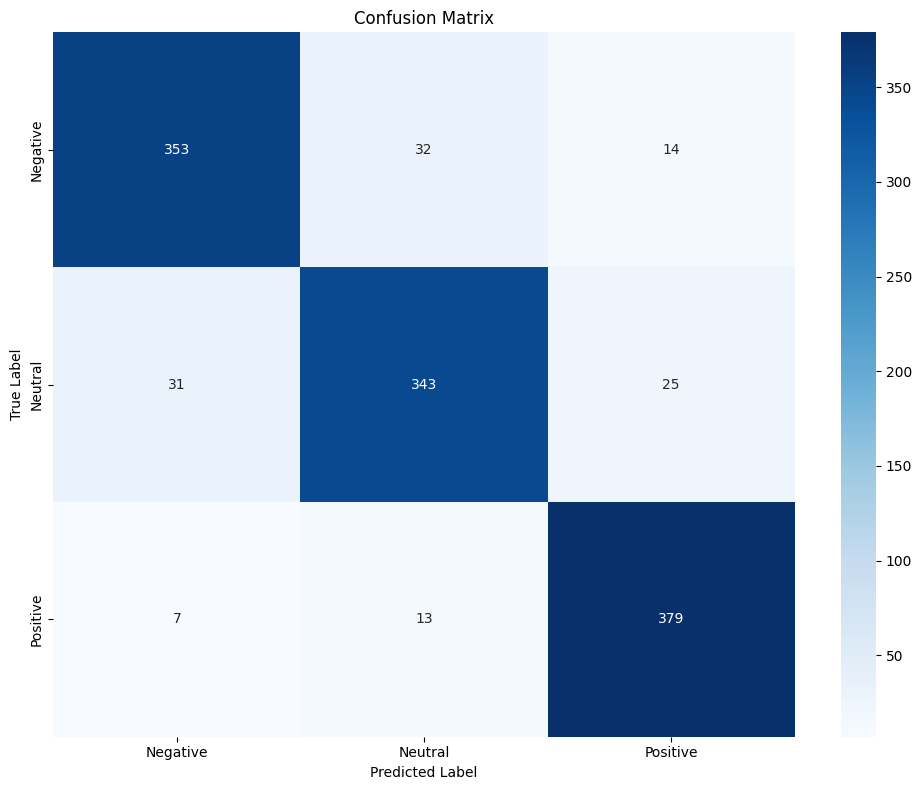


Classification Report:


,Precision,Recall,F1 Score,Accuracy
0,0.897844,0.898079,0.897707,0.898079



Per-Class Performance:


,precision,recall,f1-score,support
Negative,0.902813,0.884712,0.893671,399.0
Neutral,0.884021,0.859649,0.871665,399.0
Positive,0.906699,0.949875,0.927785,399.0


In [15]:
# Cell 5: Run Comprehensive Evaluation + Save Predictions with Confidence
try:
    from IPython.display import display, HTML
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    from pathlib import Path
    from src.training.model_evaluator import ModelEvaluator
    from src.config_three_class import CONFIG_3CLASS as CONFIG
    
    display(HTML("<div class='section-header'>Model Evaluation</div>"))
    
    # Get test data
    print("Loading test dataset...")
    texts, labels = fine_tuner.data_module.load_dataset()
    _, _, test_loader = fine_tuner.data_module.create_dataloaders(texts, labels)
    print(f"✅ Test dataset loaded with {len(test_loader.dataset)} samples.")
    
    # Run evaluation
    print("Running comprehensive evaluation...")
    evaluator = ModelEvaluator(
        model=fine_tuner.model,
        device=fine_tuner.device,
        model_name="DeBERTa 3-Class Sentiment Classifier",
        class_names=fine_tuner.class_names
    )
    
    all_labels, all_preds, all_probs = evaluator.evaluate(test_loader)
    metrics = evaluator.calculate_metrics(all_labels, all_preds, all_probs)
    
    # Save full prediction results with confidence
    print("Saving predictions with confidence scores...")
    output_df = pd.DataFrame({
        "message": texts[-len(all_labels):],  # match the test set
        "true_label": [fine_tuner.class_names[label] for label in all_labels],
        "predicted_label": [fine_tuner.class_names[pred] for pred in all_preds],
        "true_index": all_labels,
        "predicted_index": all_preds,
        "confidence": [max(prob) for prob in all_probs]
    })

    output_path = Path("saved_models/evaluation_results/test_predictions_with_confidence.csv")
    output_path.parent.mkdir(parents=True, exist_ok=True)
    output_df.to_csv(output_path, index=False)
    print(f"📄 Saved test set predictions to: {output_path}")
    
    # Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = metrics["confusion_matrix"]
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=fine_tuner.class_names,
        yticklabels=fine_tuner.class_names
    )
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()
    
    # Summary classification metrics
    print("\nClassification Report:")
    metrics_df = pd.DataFrame({
        'Precision': [metrics['precision']],
        'Recall': [metrics['recall']],
        'F1 Score': [metrics['f1']],
        'Accuracy': [metrics['accuracy']]
    })
    display(metrics_df)
    
    # Per-class metrics
    if 'per_class' in metrics:
        print("\nPer-Class Performance:")
        per_class_df = pd.DataFrame(metrics['per_class']).T
        display(per_class_df)

except Exception as e:
    print(f"An error occurred: {e}")
    import traceback
    traceback.print_exc()


In [10]:
# Cell 6: Error Analysis – Save Misclassified Predictions
import pandas as pd
from pathlib import Path
from src.config_three_class import CONFIG_3CLASS as CONFIG  # ✅ correct config

try:
    # Load and clean the raw dataset
    df_raw = pd.read_csv(CONFIG["dataset"]["dataset_path"])
    df_raw = df_raw.dropna(subset=["message"]).drop_duplicates(subset=["message"]).reset_index(drop=True)

    # Map labels: -1 → 0, 0 → 1, 1 → 2
    label_map = {-1: 0, 0: 1, 1: 2}
    df_raw["mapped_label"] = df_raw["sentiment"].map(label_map)

    # Load data split (only test set)
    texts, labels = fine_tuner.data_module.load_dataset()
    _, _, test_loader = fine_tuner.data_module.create_dataloaders(texts, labels)

    # Extract test texts from test_loader (guaranteed correct order)
    test_texts = [batch["input_ids"] for batch in test_loader]
    test_indices = test_loader.dataset.indices if hasattr(test_loader.dataset, 'indices') else list(test_loader.dataset)

    # Slice original cleaned texts to test set size
    test_texts = [texts[i] for i in range(len(test_loader.dataset))]

    # Evaluate if needed
    if 'all_preds' not in globals() or 'all_labels' not in globals():
        all_labels, all_preds, all_probs = evaluator.evaluate(test_loader)

    # Build DataFrame
    error_df = pd.DataFrame({
        "message": test_texts,
        "true_label": [fine_tuner.class_names[label] for label in all_labels],
        "predicted_label": [fine_tuner.class_names[pred] for pred in all_preds],
        "true_index": all_labels,
        "predicted_index": all_preds
    })

    # Find misclassified rows
    misclassified = error_df[error_df["true_index"] != error_df["predicted_index"]]

    # Save
    output_path = Path("saved_models/evaluation_results_deberta_3class/misclassified_predictions.csv")
    output_path.parent.mkdir(parents=True, exist_ok=True)
    misclassified.to_csv(output_path, index=False)

    print(f"❌ Saved {len(misclassified)} misclassified examples to: {output_path}")

except Exception as e:
    print("⚠️ Error during misclassification analysis:")
    import traceback
    traceback.print_exc()


❌ Saved 122 misclassified examples to: saved_models/evaluation_results_deberta_3class/misclassified_predictions.csv


In [11]:
# cell 7
import os
from IPython.display import HTML, display
from src.config_three_class import CONFIG_3CLASS as CONFIG  # ✅ correct config

# Cell 6: Generate PDF Report
try:
    display(HTML("<div class='section-header'>Generate Evaluation Report</div>"))
    
    # Use path from config
    report_path = CONFIG["evaluation"]["report_save_path"]
    os.makedirs(os.path.dirname(report_path), exist_ok=True)
    
    print(f"Generating comprehensive PDF report at {report_path}...")
    evaluator.generate_pdf_report(all_labels, all_preds, all_probs, output_path=report_path)
    print(f"✅ PDF report generated successfully at: {report_path}")
    
except Exception as e:
    print(f"❌ An error occurred: {e}")
    import traceback
    traceback.print_exc()


Generating comprehensive PDF report at saved_models/evaluation_results/deberta_3class_evaluation_report.pdf...
[INFO] Calculating metrics...
[INFO] Metrics calculated. Overall accuracy: 0.8981
[INFO] Generating evaluation report at saved_models/evaluation_results/deberta_3class_evaluation_report.pdf...
[INFO] Evaluation report saved as 'saved_models/evaluation_results/deberta_3class_evaluation_report.pdf'
✅ PDF report generated successfully at: saved_models/evaluation_results/deberta_3class_evaluation_report.pdf


In [12]:
# cell 8
import torch
from IPython.display import display, HTML, clear_output
from ipywidgets import widgets, Layout
from src.config_three_class import CONFIG_3CLASS as CONFIG  # ✅ Use 3-class config

# Cell 7: Test with Custom Inputs (Optional)
try:
    # Display header
    display(HTML("<div class='section-header'>Test with Custom Inputs</div>"))
    
    def predict_sentiment(text):
        """Function to predict sentiment of a given text"""
        inputs = fine_tuner.tokenizer(
            text,
            return_tensors="pt",
            truncation=True,
            padding="max_length",
            max_length=CONFIG["training"]["max_length"]
        )
        inputs = {key: val.to(fine_tuner.device) for key, val in inputs.items()}
        fine_tuner.model.eval()

        with torch.no_grad():
            outputs = fine_tuner.model(**inputs)
            logits = outputs.logits
            probabilities = torch.nn.functional.softmax(logits, dim=1)
            prediction = torch.argmax(logits, dim=1)

        predicted_class = fine_tuner.class_names[prediction.item()]
        confidence = probabilities[0][prediction.item()].item() * 100

        class_probs = {
            fine_tuner.class_names[i]: prob.item() * 100 
            for i, prob in enumerate(probabilities[0])
        }
        
        return predicted_class, confidence, class_probs
    
    # UI
    text_input = widgets.Textarea(
        placeholder='Enter text to analyze...',
        layout=Layout(width='100%', height='100px')
    )
    
    button = widgets.Button(
        description='Analyze Sentiment',
        button_style='primary',
        layout=Layout(width='200px')
    )
    
    output = widgets.Output()
    
    def on_button_click(b):
        with output:
            clear_output()
            if not text_input.value.strip():
                print("Please enter some text to analyze.")
                return
            
            print(f"Analyzing: \"{text_input.value}\"")
            predicted_class, confidence, class_probs = predict_sentiment(text_input.value)
            
            print(f"\nPredicted sentiment: {predicted_class} (Confidence: {confidence:.2f}%)")
            print("\nProbabilities for all classes:")
            for cls, prob in class_probs.items():
                print(f"  - {cls}: {prob:.2f}%")
    
    button.on_click(on_button_click)
    
    print("Try your own examples:")
    display(text_input)
    display(button)
    display(output)
    
except Exception as e:
    print(f"An error occurred: {e}")
    import traceback
    traceback.print_exc()


Try your own examples:


Textarea(value='', layout=Layout(height='100px', width='100%'), placeholder='Enter text to analyze...')

Button(button_style='primary', description='Analyze Sentiment', layout=Layout(width='200px'), style=ButtonStyl…

Output()

In [13]:
# # Cell X: Automatically Save Best Model After Training
# from src.config_three_class import CONFIG_3CLASS as CONFIG
# from pathlib import Path
# import os, torch, json
# from datetime import datetime

# def save_best_model_from_history(fine_tuner, base_dir="saved_models"):
#     """
#     Automatically extract the best epoch from fine_tuner history and save the model, tokenizer, and metadata.
#     """
#     history = fine_tuner.trainer.history
#     if not history or 'val_f1' not in history:
#         print("⚠️ No training history found. Cannot determine best epoch.")
#         return None

#     # 1. Identify best epoch (index + 1 for human-readable epoch)
#     best_epoch = history['val_f1'].index(max(history['val_f1'])) + 1

#     # 2. Extract best metrics
#     best_metrics = {
#         "train_loss": history["train_loss"][best_epoch-1],
#         "val_loss": history["val_loss"][best_epoch-1],
#         "val_accuracy": history["val_accuracy"][best_epoch-1],
#         "val_f1": history["val_f1"][best_epoch-1]
#     }

#     # 3. Create save path
#     model_type = fine_tuner.model_type if hasattr(fine_tuner, "model_type") else "deberta"
#     timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
#     save_dir = os.path.join(base_dir, f"{model_type}_best_3class_model_epoch{best_epoch}")
#     os.makedirs(save_dir, exist_ok=True)

#     # 4. Save model weights
#     weights_path = os.path.join(save_dir, f"best_weights_epoch{best_epoch}.pt")
#     torch.save(fine_tuner.model.state_dict(), weights_path)
#     print(f"✅ Model weights saved at: {weights_path}")

#     # 5. Save tokenizer
#     tokenizer_path = os.path.join(save_dir, "tokenizer")
#     fine_tuner.tokenizer.save_pretrained(tokenizer_path)
#     print(f"✅ Tokenizer saved at: {tokenizer_path}")

#     # 6. Save config + metrics
#     config_data = {
#         "model_name": f"{model_type.capitalize()} Sentiment Classifier",
#         "best_epoch": best_epoch,
#         "metrics": {k: float(v) for k, v in best_metrics.items()},
#         "timestamp": timestamp,
#         "class_names": fine_tuner.class_names,
#         "device_trained_on": str(fine_tuner.device),
#         "pretrained_model": CONFIG["models"][model_type]["pretrained_model_name"],
#         "training_config": CONFIG["training"],
#         "dataset_config": {k: v for k, v in CONFIG["dataset"].items() if "raw" not in k}
#     }

#     with open(os.path.join(save_dir, f"config_{timestamp}.json"), "w") as f:
#         json.dump(config_data, f, indent=4)
#         print(f"✅ Config saved at: {save_dir}/config_{timestamp}.json")

#     # 7. Write short info file
#     info_txt = os.path.join(save_dir, "best_model_info.txt")
#     with open(info_txt, "w") as f:
#         f.write(f"Best Model Information\n====================\n")
#         f.write(f"Epoch: {best_epoch}\n")
#         for k, v in best_metrics.items():
#             f.write(f"{k.replace('_', ' ').title()}: {v:.4f}\n")
#         f.write(f"Timestamp: {timestamp}\n")
#         f.write(f"Weights file: {os.path.basename(weights_path)}\n")
#     print(f"📄 Summary saved to: {info_txt}")

#     return save_dir


In [14]:
# # cell 11
# save_dir = save_best_model_from_history(fine_tuner)
# print(f"Best model saved at: {save_dir}")

✅ Model weights saved at: saved_models/deberta_best_3class_model_epoch3/best_weights_epoch3.pt
✅ Tokenizer saved at: saved_models/deberta_best_3class_model_epoch3/tokenizer
✅ Config saved at: saved_models/deberta_best_3class_model_epoch3/config_20250326_184021.json
📄 Summary saved to: saved_models/deberta_best_3class_model_epoch3/best_model_info.txt
Best model saved at: saved_models/deberta_best_3class_model_epoch3


In [ ]:
# Cell: Save trained model, tokenizer, and training config
import os
import json
from datetime import datetime

# === Paths ===
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
save_dir = f"saved_models/deberta_3class_final_model_{timestamp}"
os.makedirs(save_dir, exist_ok=True)

# === Save full model + tokenizer (HuggingFace format) ===
fine_tuner.model.save_pretrained(save_dir)
fine_tuner.tokenizer.save_pretrained(save_dir)
print(f"✅ Model + tokenizer saved to: {save_dir}")

# === Save custom training config snapshot ===
config_snapshot = {
    "model_name": CONFIG_3CLASS["models"]["deberta"]["pretrained_model_name"],
    "class_names": CONFIG_3CLASS["dataset"]["class_names"],
    "num_labels": CONFIG_3CLASS["dataset"]["num_labels"],
    "training_config": CONFIG_3CLASS["training"],
    "dataset_config": {
        k: v for k, v in CONFIG_3CLASS["dataset"].items()
        if "raw" not in k  # exclude raw path to keep it portable
    },
    "metrics": fine_tuner.metrics if hasattr(fine_tuner, 'metrics') else None,
    "timestamp": timestamp
}

with open(os.path.join(save_dir, "config_custom.json"), "w") as f:
    json.dump(config_snapshot, f, indent=4)

print(f"📄 Custom training config saved at: {os.path.join(save_dir, 'config_custom.json')}")


In [ ]:
# Cell: Load saved DeBERTa 3-class model + tokenizer
from transformers import DebertaForSequenceClassification, DebertaTokenizerFast

# === Path to saved model directory ===
load_path = "saved_models/deberta_3class_final_model_YYYYMMDD_HHMMSS"  # <-- update timestamp if needed

# === Load model and tokenizer ===
model = DebertaForSequenceClassification.from_pretrained(load_path)
tokenizer = DebertaTokenizerFast.from_pretrained(load_path)

# === Set to eval mode (for inference) ===
model.eval()
print(f"✅ Model and tokenizer loaded from: {load_path}")
